# Project 3: Poisonous Mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please **prepare your own write-up and write your own code**.

In [1]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [2]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [3]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### Part 1:

Do a principal components analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].  Show a lineplot of fraction of total variance vs. number of principal components.

Notes:
* You can use `PCA` to produce a PCA analysis.

The fraction of the total variance explained with 1 component(s) is  16.40% 

The fraction of the total variance explained with 2 component(s) is  29.73% 

The fraction of the total variance explained with 3 component(s) is  39.90% 

The fraction of the total variance explained with 4 component(s) is  46.96% 

The fraction of the total variance explained with 5 component(s) is  50.83% 

The fraction of the total variance explained with 10 component(s) is  65.22% 

The fraction of the total variance explained with 20 component(s) is  80.89% 

The fraction of the total variance explained with 30 component(s) is  89.85% 

The fraction of the total variance explained with 40 component(s) is  95.09% 

The fraction of the total variance explained with 50 component(s) is  98.21% 



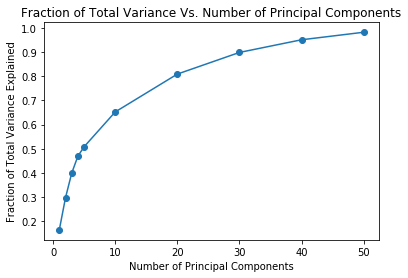

In [5]:
def P1():
### STUDENT START ###

    pc_var_tracker = []
    k = [1,2,3,4,5,10,20,30,40,50]
    #define the size of the components
   
    #finding PCs in the data
    
    for comp in k:
        pc = PCA(n_components = comp)
        pc.fit(train_data)
        print(f"The fraction of the total variance explained with {comp} component(s) is {pc.explained_variance_ratio_.cumsum()[-1]: .2%}", "\n")
        pc_var_tracker.append(pc.explained_variance_ratio_.cumsum()[-1])
    #append all values into one list
    plt.plot(k, pc_var_tracker, marker = 'o')
    plt.title("Fraction of Total Variance Vs. Number of Principal Components")
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Fraction of Total Variance Explained")
        

### STUDENT END ###

P1()

### Part 2:

PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) examples in red and the negative (non-poisonous) examples in green. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.

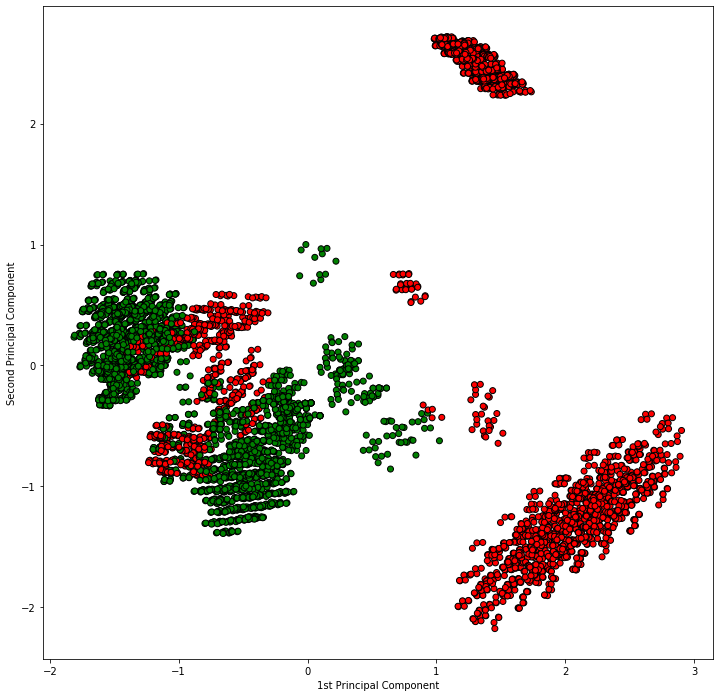

In [6]:
def P2():

### STUDENT START ###
    pc = PCA(n_components=2)
    # Transform the data to 2 dimensions
    train_data_transformed = pc.fit_transform(train_data)
    plt.figure(figsize=(12, 12))
    # Create the color-coding (1=poisonous, 0=not). Poisonous is red, and non-poisonous is green
    col = np.where(train_labels==1, 'red', 'green')
    plt.scatter(train_data_transformed[:,0], train_data_transformed[:,1], c = col, edgecolor='black')
    plt.xlabel("1st Principal Component")
    plt.ylabel("Second Principal Component")
    
    
    
    ### STUDENT END ###

P2()

### Part 3:

Fit a k-means cluster model with 6 clusters over the 2d projected data. As in part 2, show the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.

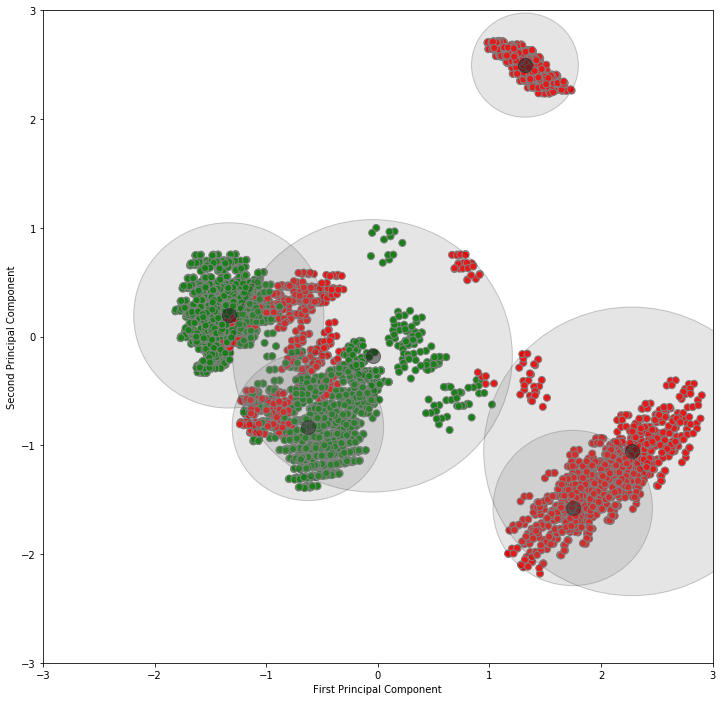

In [7]:
def P3():

    def dist(a, b, ax=1):
        return np.linalg.norm(a - b, axis=ax)

    ### STUDENT START ###
    pc = PCA(n_components=2)
    # Transform the data to 2 dimensions
    train_data_transformed = pc.fit_transform(train_data)
    k_cluster = KMeans(n_clusters = 6).fit(train_data_transformed) 
    col = np.where(train_labels==1, 'red', 'green')
    plt.figure(figsize=(12, 12))
    # #Plot data points
    plt.scatter(train_data_transformed[:,0], train_data_transformed[:,1], c=col, s=50, edgecolor='grey')
     # Plotting cluster centroid
    plt.scatter (k_cluster.cluster_centers_[:,0], k_cluster.cluster_centers_[:,1],
                c='black', s=200, alpha=0.5)

    #Setting X and Y ranges for the graph
    plt.xlim([np.floor(train_data_transformed.min()), np.ceil(train_data_transformed.max())])
    plt.ylim([np.floor(train_data_transformed.min()), np.ceil(train_data_transformed.max())])  
    #plot circle that goes through cluster example that is most distant from the centroid
    for j in range(max(k_cluster.labels_)+1):
        #find the points in each cluster
        k_data = train_data_transformed [k_cluster.labels_==j]
        #find the cluster center
        cluster_center = k_cluster.cluster_centers_[j]
        #find distance of max point
        radius = dist(cluster_center, k_data).max()
        #establish the circle
        circle=plt.Circle(tuple(cluster_center), radius, clip_on=True)
        #set the color
        circle.set_facecolor('gray')
        #create transparency so it doesn't cover the points
        circle.set_alpha(0.2)
        #create border for circle
        circle.set_edgecolor('black')   
        #add circle to the plot
        plt.gca().add_artist(circle)
        plt.xlabel("First Principal Component")
        plt.ylabel("Second Principal Component")
    ### STUDENT END ###

P3()

### Part 4:

Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  Show plots of the estimated density contours.  

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* You can use `contour` without the `norm` and `levels` parameters. 

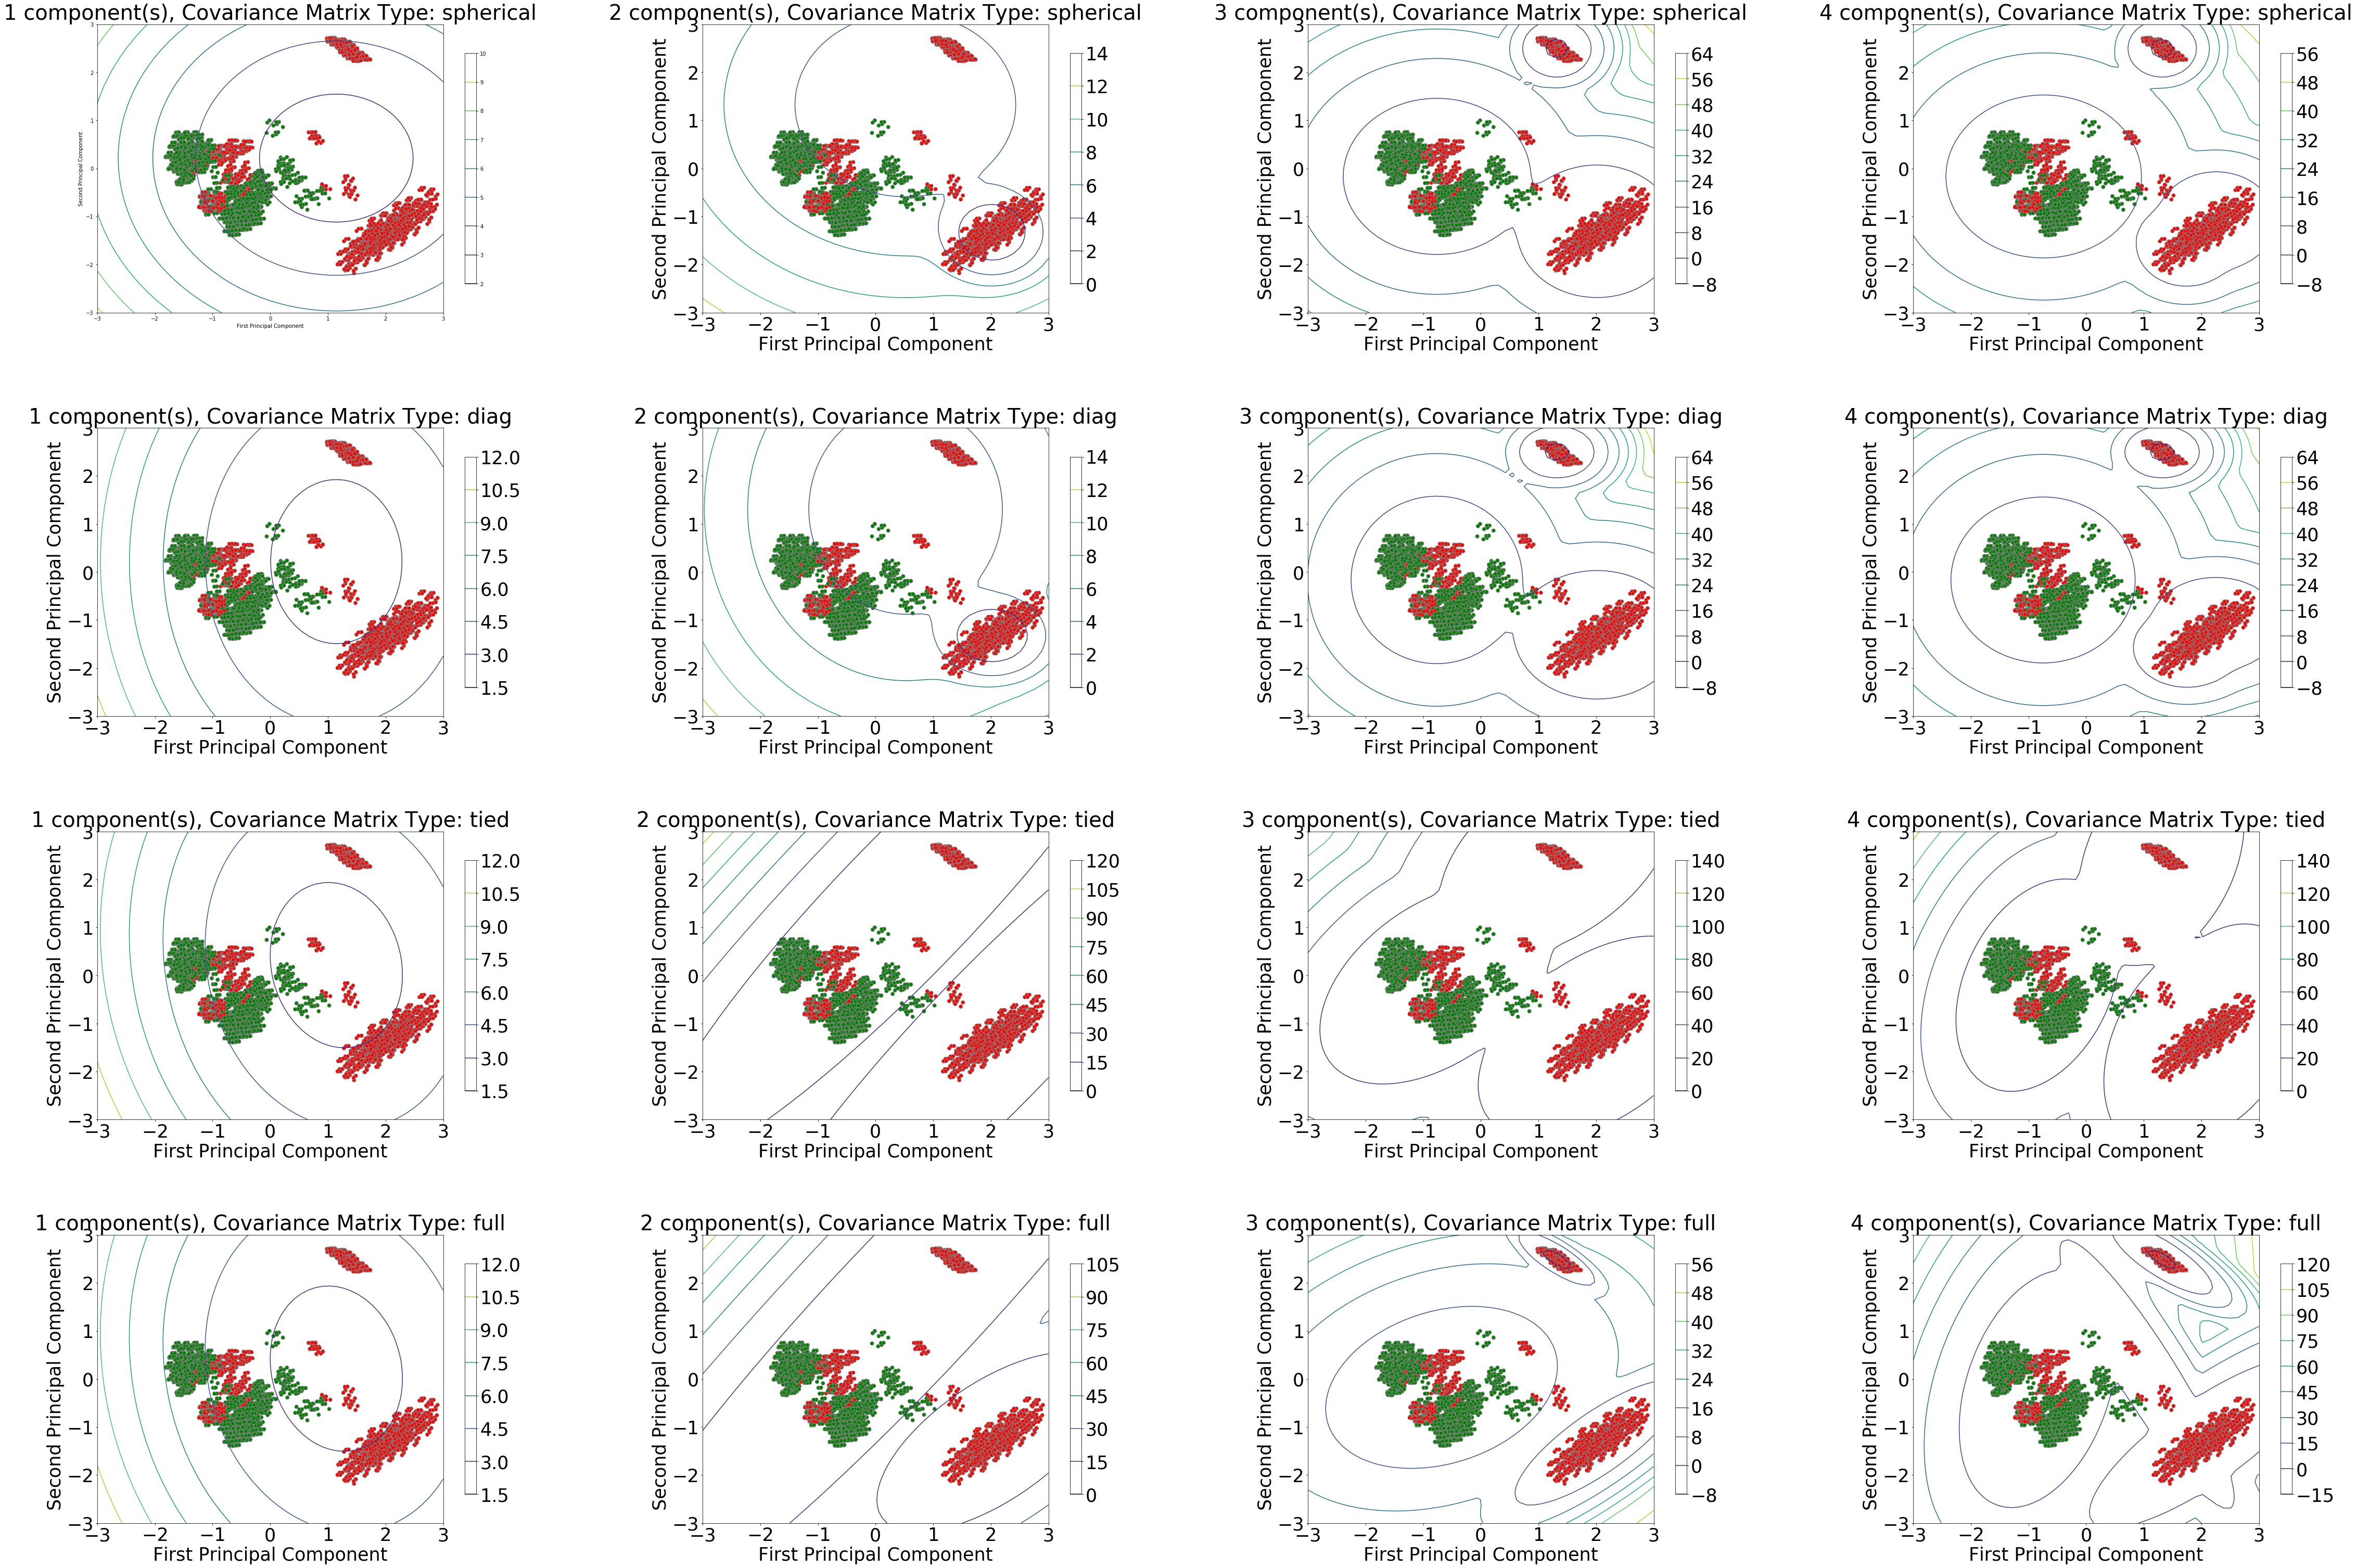

In [8]:
def P4():

    ### STUDENT START ###
    pc = PCA(n_components=2)
        # Transform the data to 2 dimensions
    train_data_transformed = pc.fit_transform(train_data)
    #cov mixture types
    cov_type = ['spherical', 'diag', 'tied', 'full']
    #filtering on only poisonous mushrooms
    pois = train_data_transformed[train_labels==1]
    #x and y coordinates for graphs
    xlab = np.linspace(-3.0, 3.0)
    ylab = np.linspace(-3.0, 3.0)
    #alldatapoints
    x,y = np.meshgrid(xlab, ylab)
    xx = np.array([x.ravel(), y.ravel()]).T
    fig = plt.figure(figsize = (60,40))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=.4, wspace=0.4)

    for j in range(0,4):
        covtype = cov_type[j]
        for k in range(1,5):
            GM = GaussianMixture(n_components = k, covariance_type = covtype, random_state=12345)
            GM.fit(pois)
            z = -GM.score_samples(xx)
            z = z.reshape(x.shape)
            axes = fig.add_subplot(4, 4, 4*j+k)

            cont = plt.contour(x, y, z)
            #Plot formatting
            colorb = plt.colorbar(cont, shrink=0.8, extend='both')
            plt.rc('font', size=35)          # controls default text sizes
            plt.rc('axes', titlesize=40)     # fontsize of the axes title
            plt.rc('axes', labelsize=35)
            plt.title(f"{k} component(s), Covariance Matrix Type: {covtype}")

            col = np.where(train_labels==1, 'red', 'green')

            plt.scatter(train_data_transformed[:,0], train_data_transformed[:,1], c=col, s=50, edgecolor='grey')
            plt.axis('tight')
            plt.xlabel("First Principal Component")
            plt.ylabel("Second Principal Component")




### STUDENT END ###

P4()

### Part 5:

Fit two Gaussian mixture models, one for the positive examples and one for the negative examples in your 2d projected data. Use 4 mixture components and full convariance for each model.  Predict the test example labels by picking the labels corresponding to the larger of the two models' probabilities.  What is the accuracy or you predictions on the test data?

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `GaussianMixture`'s `score_samples` method to find the probabilities.

In [9]:
def P5():

    ### STUDENT START ###

    pc = PCA(n_components=2)
    # Transform the data to 2 dimensions
    train_data_transformed = pc.fit_transform(train_data)

    #transform test data using same 2 dimensions
    test_data_transformed = pc.transform(test_data)


    #cov mixture types
    #filtering on only poisonous mushrooms
    pois = train_data_transformed[train_labels==1]
    nonpois = train_data_transformed[train_labels==0]

    #poisonous GMM
    GM1 = GaussianMixture(n_components = 4, covariance_type = 'full', random_state=12345)
    GM1.fit(pois)
    poisprob = GM1.score_samples(test_data_transformed)

    #non-poisonous GMM
    GM2 = GaussianMixture(n_components = 4, covariance_type = 'full', random_state=12345)
    GM2.fit(nonpois)
    nonpois = GM2.score_samples(test_data_transformed)

    #calculating accuracy
    predicted_values = np.where(poisprob>nonpois, 1,0)
    correct = np.where(predicted_values == np.array(test_labels), 1, 0)
    accuracy = correct.sum() / len(predicted_values)
    print(f"Accuracy of predictions of the test data is {accuracy: .2%}")


    ### STUDENT END ###

P5()

Accuracy of predictions of the test data is  95.02%


### Part 6:

Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.


* For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

$$( (3 \, mean \, vectors + 3 \, covariance \, matrices) * 2 \, gmm \, components ) * 2 \, classes = 24 \, parameters$$

In [10]:
def P6():

    ### STUDENT START ###
    cov_type = ['spherical', 'diag', 'tied', 'full']
    gmm_components= 50
    pca_components = 50
    


    max_accuracy=0
    for i in range(1,pca_components+1):
        for j in range(1, gmm_components+1):
            for covtype in cov_type:
                #same variance for each GSM component, across all PC, so number of parameters will be j gmm var + j gmm components * i PC components * number of classes
                # 2 * (j + j * i ) = 2 * j * (1 + i)
                if covtype =='spherical':
                    num_parameters = (i + 1) * j * 2
                #for diagonal, only the diagonals of covariance matrix are non-zero, so number of parameters are 
                # i variances for each pc * j gmm components + i principal components * j gmms * number of classes
                # = (i * j + i* j) *2
                elif covtype == 'diag':
                    num_parameters = 2* i * j * 2
                #for tied,all the Gaussian mixture components have the same covariance matrix. We only need the upper half of the 
                #covariance matrix to get all the unique values of the principal components. So that's i (i+1)/2. 
                #Then there are i prinicpal components and j Gmm components, times the number of classes, so total is 
                #((i*(i+1)/2 + i * j) * 2)
                elif covtype == 'tied':
                    num_parameters = (i * j + (i * (i+1)/2)) * 2
                #for full, each Gaussian mixture component has its own covariance matrix. So again, similar to above
                #the number of covariance parameters is i * (i+1)/2; however this time, we multiply by the number of 
                #gmms j, so the number of covariance parameters is i * (i+1)/2 * j. Then there are i principal components
                #and j gmm components and 2 classes, so total is (i*(i+1)/2 * j + i * j) *2  
                
                elif covtype == 'full':    
                    num_parameters =  (i * j + (i*(i+1))/2 * j )*2
                    
                if num_parameters <=50:
                    pc = PCA(n_components=i)
                    # Transform the training data 
                    train_data_transformed = pc.fit_transform(train_data)
                    #transform test data 
                    test_data_transformed = pc.transform(test_data)
                     #filtering on only poisonous mushrooms
                    pois = train_data_transformed[train_labels==1]
                    nonpois = train_data_transformed[train_labels==0]


                    #poisonous GMM
                    GM1 = GaussianMixture(n_components = j, covariance_type = covtype, random_state=12345)
                    GM1.fit(pois)
                    poisprob = GM1.score_samples(test_data_transformed)

                    #non-poisonous GMM
                    GM2 = GaussianMixture(n_components = j, covariance_type = covtype, random_state=12345)
                    GM2.fit(nonpois)
                    nonpois = GM2.score_samples(test_data_transformed)

                     #calculating accuracy
                    predicted_values = np.where(poisprob > nonpois, 1,0)
                    correct = np.where(predicted_values == np.array(test_labels), 1, 0)
                    accuracy = correct.sum() / len(predicted_values)
                    if accuracy > max_accuracy:
                        max_accuracy = accuracy
                        placeholder = f"|PCA Components: {i:<3} | GMM Components: {j: <3}| Covariance Type: {covtype:<10} | Number of Parameters: {num_parameters: <3.0f}|Accuracy: {max_accuracy: .2%}|"
                    print(f"|PCA Components: {i:<3} | GMM Components: {j:<3}| Covariance Type: {covtype:<10} | Number of Parameters: {num_parameters:<3.0f}| Accuracy: {accuracy: .2%}|")
                else:
                    pass
    print(f"\n Gaussian Mixture Model with Best Accuracy: \n")
    print(placeholder)


### STUDENT END ###

P6()

|PCA Components: 1   | GMM Components: 1  | Covariance Type: spherical  | Number of Parameters: 4  | Accuracy:  84.43%|
|PCA Components: 1   | GMM Components: 1  | Covariance Type: diag       | Number of Parameters: 4  | Accuracy:  84.43%|
|PCA Components: 1   | GMM Components: 1  | Covariance Type: tied       | Number of Parameters: 4  | Accuracy:  84.43%|
|PCA Components: 1   | GMM Components: 1  | Covariance Type: full       | Number of Parameters: 4  | Accuracy:  84.43%|
|PCA Components: 1   | GMM Components: 2  | Covariance Type: spherical  | Number of Parameters: 8  | Accuracy:  89.86%|
|PCA Components: 1   | GMM Components: 2  | Covariance Type: diag       | Number of Parameters: 8  | Accuracy:  89.86%|
|PCA Components: 1   | GMM Components: 2  | Covariance Type: tied       | Number of Parameters: 6  | Accuracy:  88.35%|
|PCA Components: 1   | GMM Components: 2  | Covariance Type: full       | Number of Parameters: 8  | Accuracy:  89.86%|
|PCA Components: 1   | GMM Components: 3

|PCA Components: 2   | GMM Components: 3  | Covariance Type: tied       | Number of Parameters: 18 | Accuracy:  94.48%|
|PCA Components: 2   | GMM Components: 3  | Covariance Type: full       | Number of Parameters: 30 | Accuracy:  93.59%|
|PCA Components: 2   | GMM Components: 4  | Covariance Type: spherical  | Number of Parameters: 24 | Accuracy:  94.57%|
|PCA Components: 2   | GMM Components: 4  | Covariance Type: diag       | Number of Parameters: 32 | Accuracy:  94.04%|
|PCA Components: 2   | GMM Components: 4  | Covariance Type: tied       | Number of Parameters: 22 | Accuracy:  94.57%|
|PCA Components: 2   | GMM Components: 4  | Covariance Type: full       | Number of Parameters: 40 | Accuracy:  95.02%|
|PCA Components: 2   | GMM Components: 5  | Covariance Type: spherical  | Number of Parameters: 30 | Accuracy:  93.06%|
|PCA Components: 2   | GMM Components: 5  | Covariance Type: diag       | Number of Parameters: 40 | Accuracy:  93.24%|
|PCA Components: 2   | GMM Components: 5

|PCA Components: 8   | GMM Components: 1  | Covariance Type: diag       | Number of Parameters: 32 | Accuracy:  91.28%|
|PCA Components: 8   | GMM Components: 2  | Covariance Type: spherical  | Number of Parameters: 36 | Accuracy:  96.89%|
|PCA Components: 9   | GMM Components: 1  | Covariance Type: spherical  | Number of Parameters: 20 | Accuracy:  87.54%|
|PCA Components: 9   | GMM Components: 1  | Covariance Type: diag       | Number of Parameters: 36 | Accuracy:  90.30%|
|PCA Components: 9   | GMM Components: 2  | Covariance Type: spherical  | Number of Parameters: 40 | Accuracy:  96.62%|
|PCA Components: 10  | GMM Components: 1  | Covariance Type: spherical  | Number of Parameters: 22 | Accuracy:  87.72%|
|PCA Components: 10  | GMM Components: 1  | Covariance Type: diag       | Number of Parameters: 40 | Accuracy:  91.19%|
|PCA Components: 10  | GMM Components: 2  | Covariance Type: spherical  | Number of Parameters: 44 | Accuracy:  96.89%|
|PCA Components: 11  | GMM Components: 1